In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
dropbox_path = Path("D:/Dropbox/1_Academics/Research/22-TEGS_modelling/TEGS GenX shared folder/GenX_runs")
location_dir = {
    "newEngland": dropbox_path.joinpath("outputs", "newEngland", "shadow_price_stor2"),
    "texas": dropbox_path.joinpath("outputs", "texas", "shadow_price_stor2"),
}

In [3]:
emissions_levels = [0.01]
temperatures = [2400]
lossrates = [3]
TEGSdischargecaps = [10, 20, 50, 100, 150, 200, 300, 400, 500, 1000, 1500, 2000, 3000, 4000, 5000, 7500, 10000]
TEGSdischarge_chargeratio = [1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 5, 6]
TEGSdischarge_storageratio = [10, 20, 30, 40, 50, 60, 70, 80]

In [4]:
def make_dirname(emiss_level, temperature, lossrate, TEGSdischargecap, TEGSdischarge_chargeratio, TEGSdischarge_storageratio):
    return f'{float(emiss_level)}_{float(temperature)}_{float(lossrate)}_{float(TEGSdischargecap)}_{float(TEGSdischarge_chargeratio)}_{float(TEGSdischarge_storageratio)}_stor2'

def make_colname(emiss_level, temperature, lossrate, TEGSdischargecap, TEGSdischarge_chargeratio, TEGSdischarge_storageratio):
    return f'{float(emiss_level)}_{float(temperature)}_{float(lossrate)}_{float(TEGSdischarge_chargeratio)}_{float(TEGSdischarge_storageratio)}_stor2'

In [5]:
shadow_prices = {}
for loc_name, loc_path in location_dir.items():
    prices = pd.DataFrame(index = TEGSdischargecaps)
    shadow_prices[loc_name] = prices
    for emiss_level in emissions_levels:
        for tegs_d_c_ratio in TEGSdischarge_chargeratio:
            for tegs_d_s_ratio in TEGSdischarge_storageratio:
                for temperature in temperatures:
                    for lossrate in lossrates:
                        for TEGSdischargecap in TEGSdischargecaps:
                            dir_name = make_dirname(emiss_level, temperature, lossrate, TEGSdischargecap, tegs_d_c_ratio, tegs_d_s_ratio)
                            dir_path = loc_path.joinpath(dir_name)
                            file_path = dir_path.joinpath('shadow_price_summ.csv')
                            if file_path.exists():
                                df = pd.read_csv(file_path, index_col=0)
                                colname = make_colname(emiss_level, temperature, lossrate, TEGSdischargecap, tegs_d_c_ratio, tegs_d_s_ratio)
                                prices.loc[TEGSdischargecap, f'{colname}_disch'] = -df.loc["value", " discharge"]
                                prices.loc[TEGSdischargecap, f'{colname}_charg'] = -df.loc["value", " charge"]
                                prices.loc[TEGSdischargecap, f'{colname}_stor'] = -df.loc["value", " storage"]
                                prices.loc[TEGSdischargecap, f'{colname}'] = -df.loc["value", :].sum()
                                

C:\Users\Ruaridh\AppData\Local\Temp\ipykernel_11276\1113727497.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices.loc[TEGSdischargecap, f'{colname}_disch'] = -df.loc["value", " discharge"]
C:\Users\Ruaridh\AppData\Local\Temp\ipykernel_11276\1113727497.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices.loc[TEGSdischargecap, f'{colname}_charg'] = -df.loc["value", " charge"]
C:\Users\Ruaridh\AppData\Local\Temp\ipykernel_11276\1113727497.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

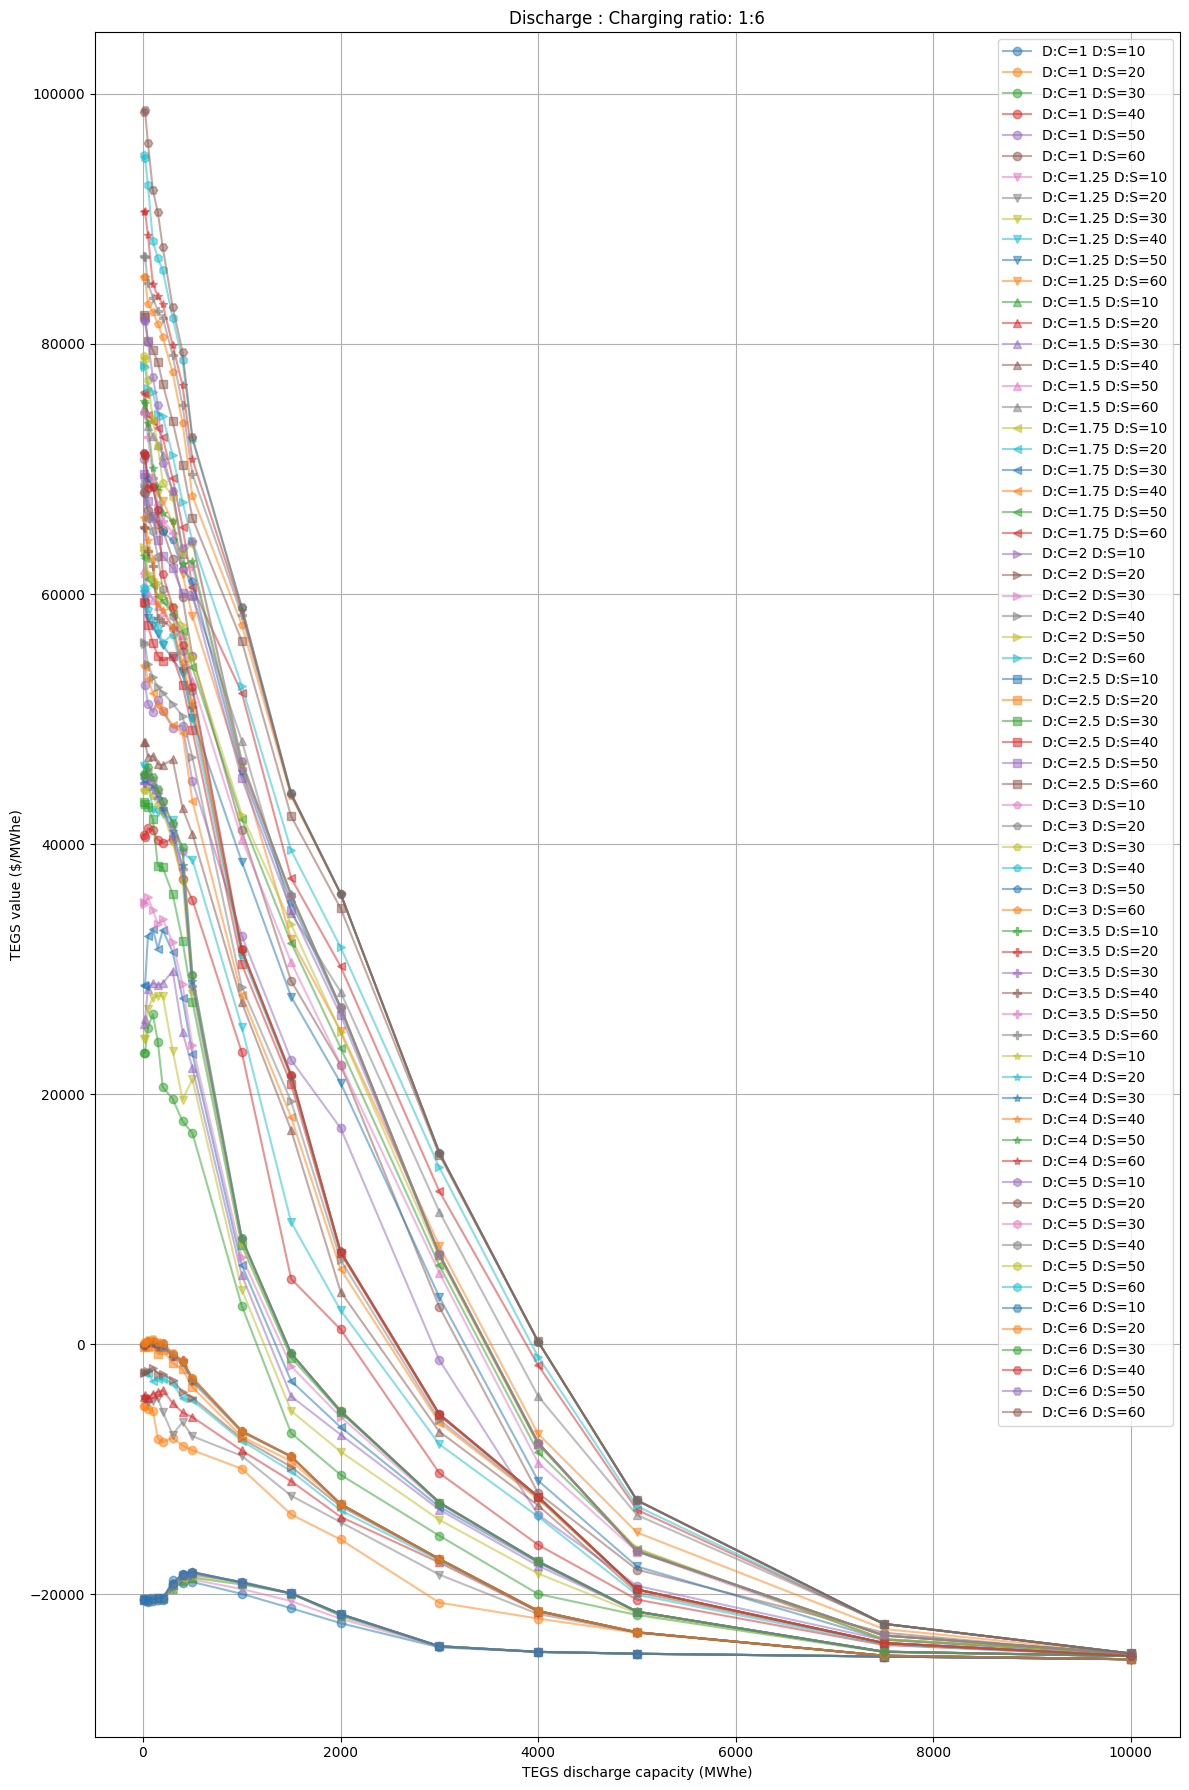

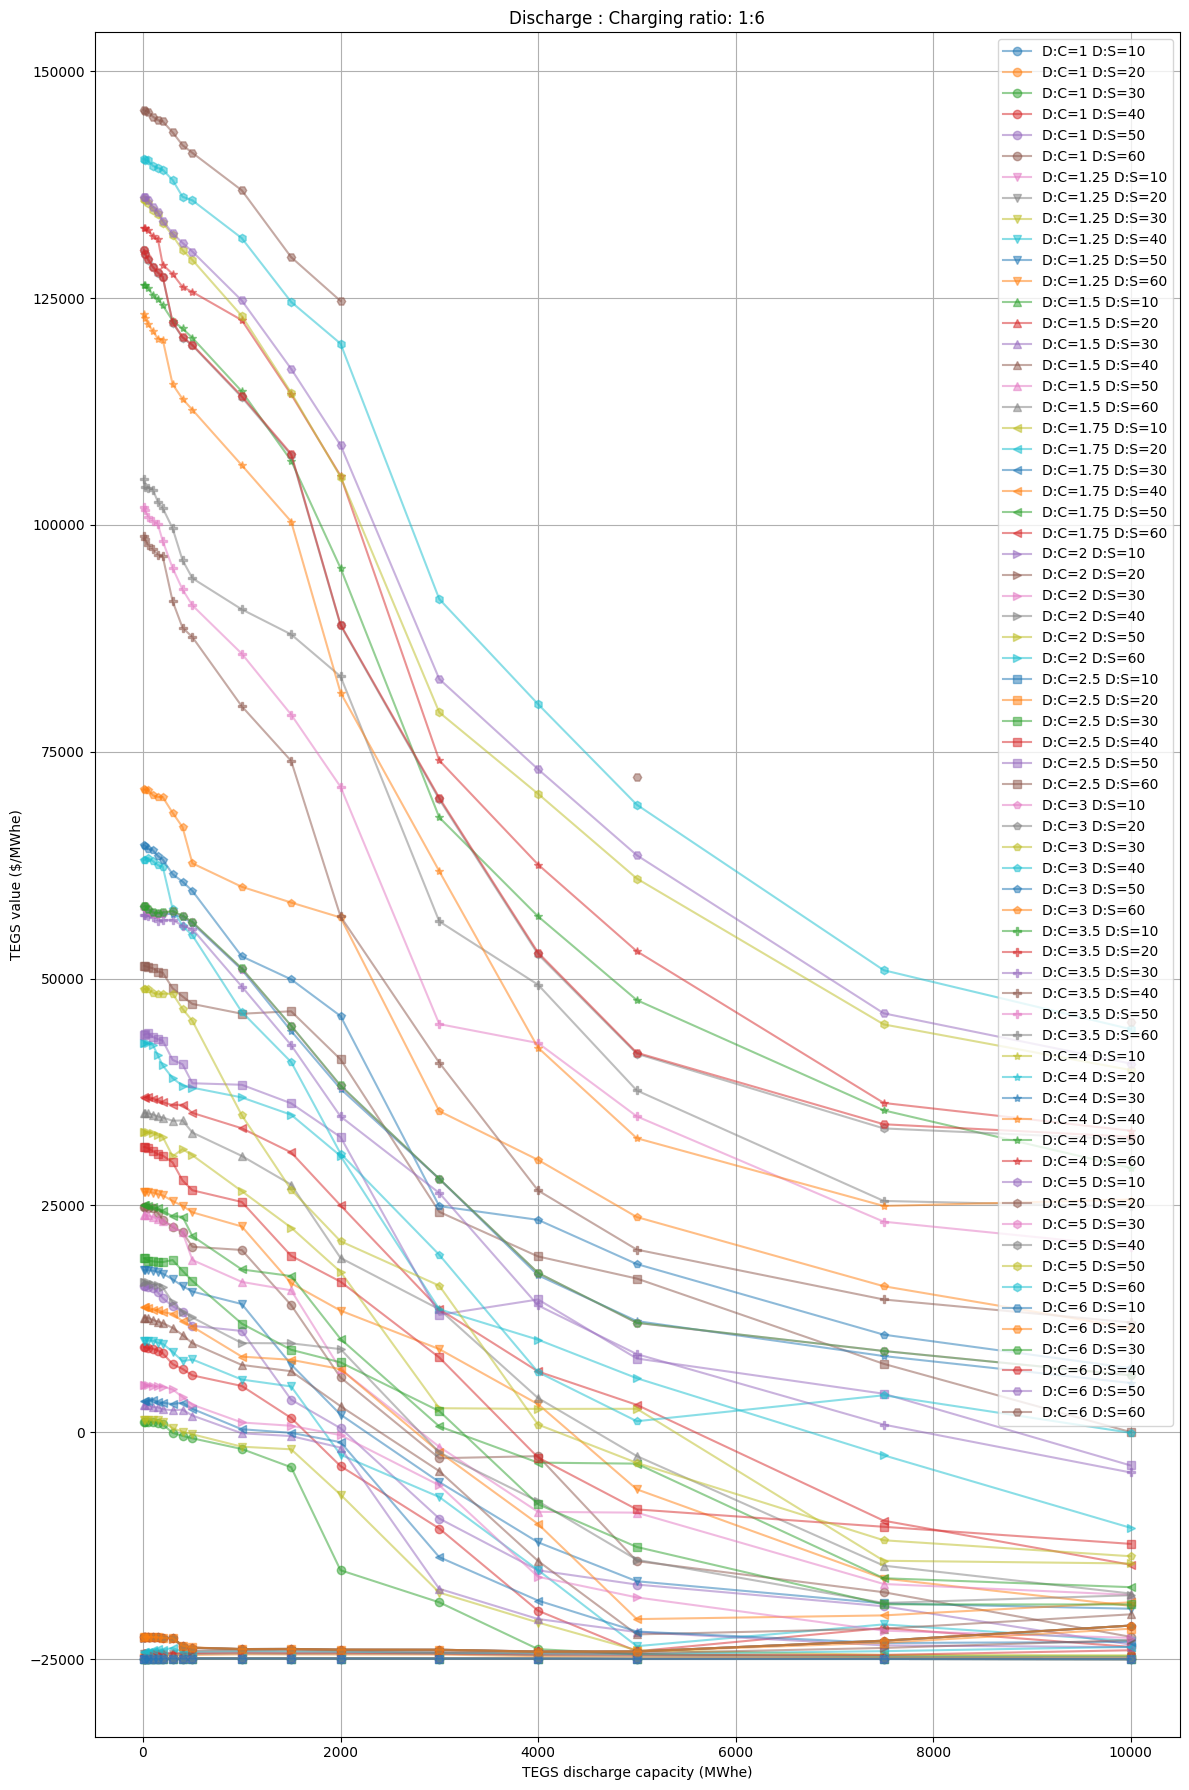

In [6]:
marker_list = ['o','v','^','<','>','s','p','P','*','h','H','X','D','d','|','_']
    
for loc_name, loc_path in location_dir.items():
    prices = shadow_prices[loc_name]
    for emiss_level in emissions_levels:
        for temperature in temperatures:
            for lossrate in lossrates:

                fig, ax = plt.subplots(figsize=(12, 18))

                for idx, tegs_d_c_ratio in enumerate(TEGSdischarge_chargeratio):
                    for tegs_d_s_ratio in TEGSdischarge_storageratio:
                
                            dir_name = make_dirname(emiss_level, temperature, lossrate, TEGSdischargecap, tegs_d_c_ratio, tegs_d_s_ratio)
                            colname = make_colname(emiss_level, temperature, lossrate, TEGSdischargecap, tegs_d_c_ratio, tegs_d_s_ratio)

                            if f'{colname}_disch' in prices.columns:
                                ax.plot(prices.index, prices[f'{colname}_disch'], '-', marker=marker_list[idx], alpha=0.5, label=f'D:C={tegs_d_c_ratio} D:S={tegs_d_s_ratio}')
                                # ax[idx].set_xscale('log')
                                # ax[idx].set_ylim(0, 125000)
                    ax.grid()
                    ax.legend()
                    ax.set_xlabel('TEGS discharge capacity (MWhe)')
                    ax.set_ylabel('TEGS value ($/MWhe)')
                    ax.set_title(f'Discharge : Charging ratio: 1:{tegs_d_c_ratio}')
                fig.tight_layout()
                            

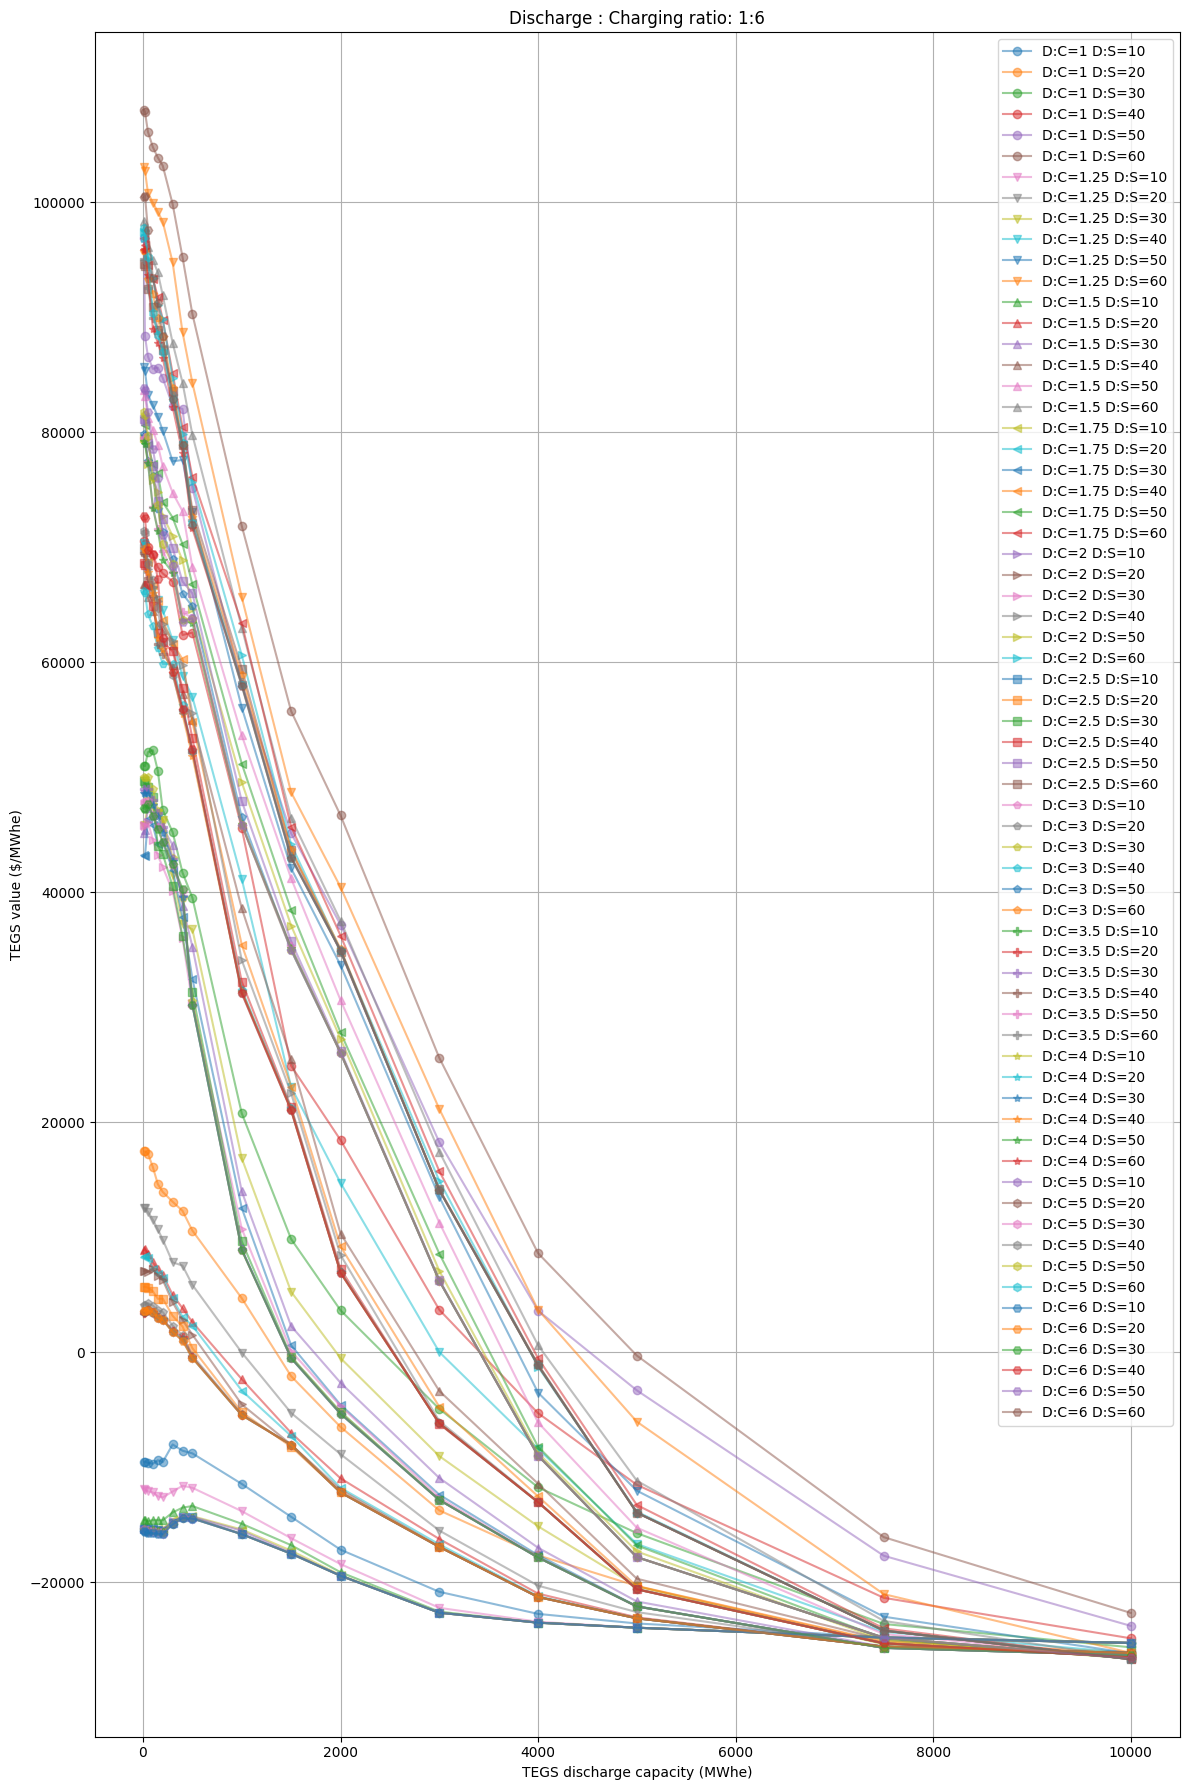

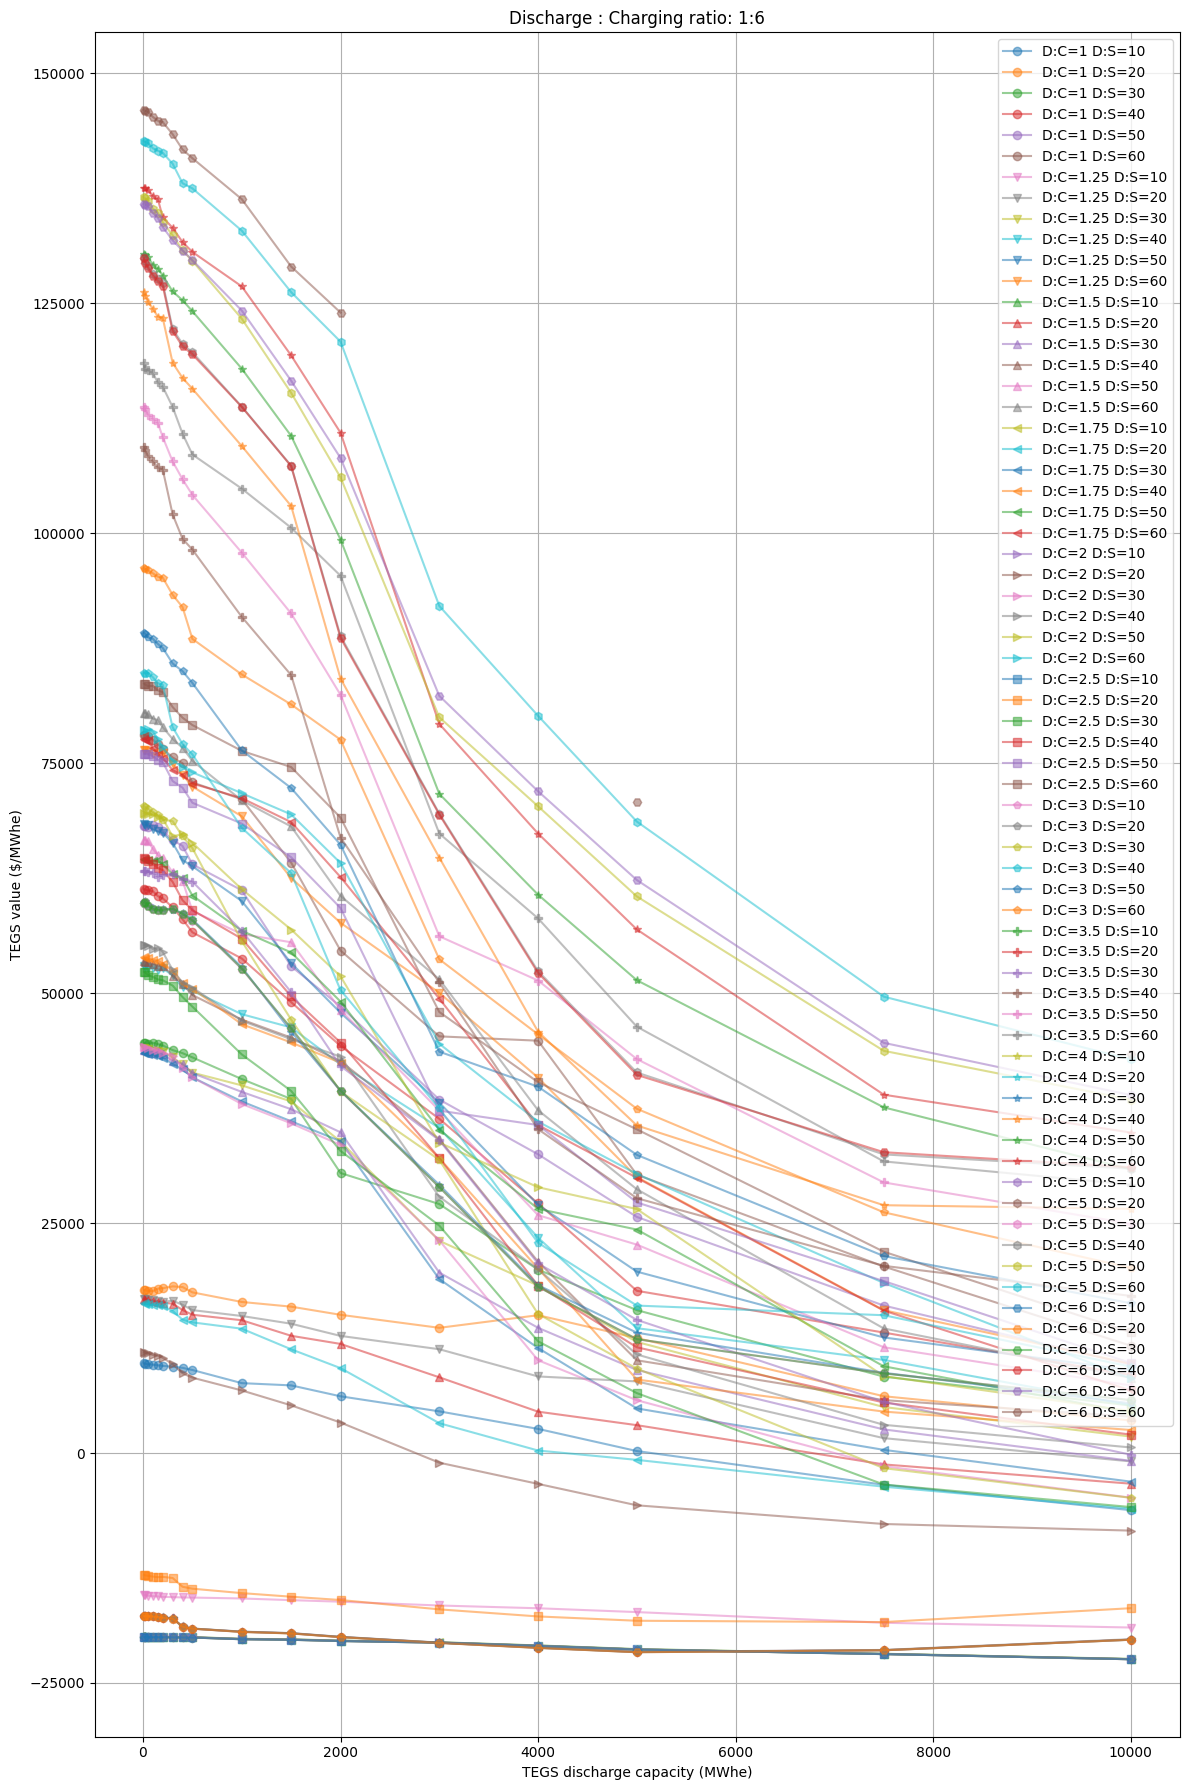

In [7]:
marker_list = ['o','v','^','<','>','s','p','P','*','h','H','X','D','d','|','_']
    
for loc_name, loc_path in location_dir.items():
    prices = shadow_prices[loc_name]
    for emiss_level in emissions_levels:
        for temperature in temperatures:
            for lossrate in lossrates:

                fig, ax = plt.subplots(figsize=(12, 18))

                for idx, tegs_d_c_ratio in enumerate(TEGSdischarge_chargeratio):
                    for tegs_d_s_ratio in TEGSdischarge_storageratio:
                
                            dir_name = make_dirname(emiss_level, temperature, lossrate, TEGSdischargecap, tegs_d_c_ratio, tegs_d_s_ratio)
                            colname = make_colname(emiss_level, temperature, lossrate, TEGSdischargecap, tegs_d_c_ratio, tegs_d_s_ratio)

                            if f'{colname}' in prices.columns:
                                ax.plot(prices.index, prices[f'{colname}'], '-', marker=marker_list[idx], alpha=0.5, label=f'D:C={tegs_d_c_ratio} D:S={tegs_d_s_ratio}')
                                # ax[idx].set_xscale('log')
                                # ax[idx].set_ylim(0, 125000)
                    ax.grid()
                    ax.legend()
                    ax.set_xlabel('TEGS discharge capacity (MWhe)')
                    ax.set_ylabel('TEGS value ($/MWhe)')
                    ax.set_title(f'Discharge : Charging ratio: 1:{tegs_d_c_ratio}')
                fig.tight_layout()
                            

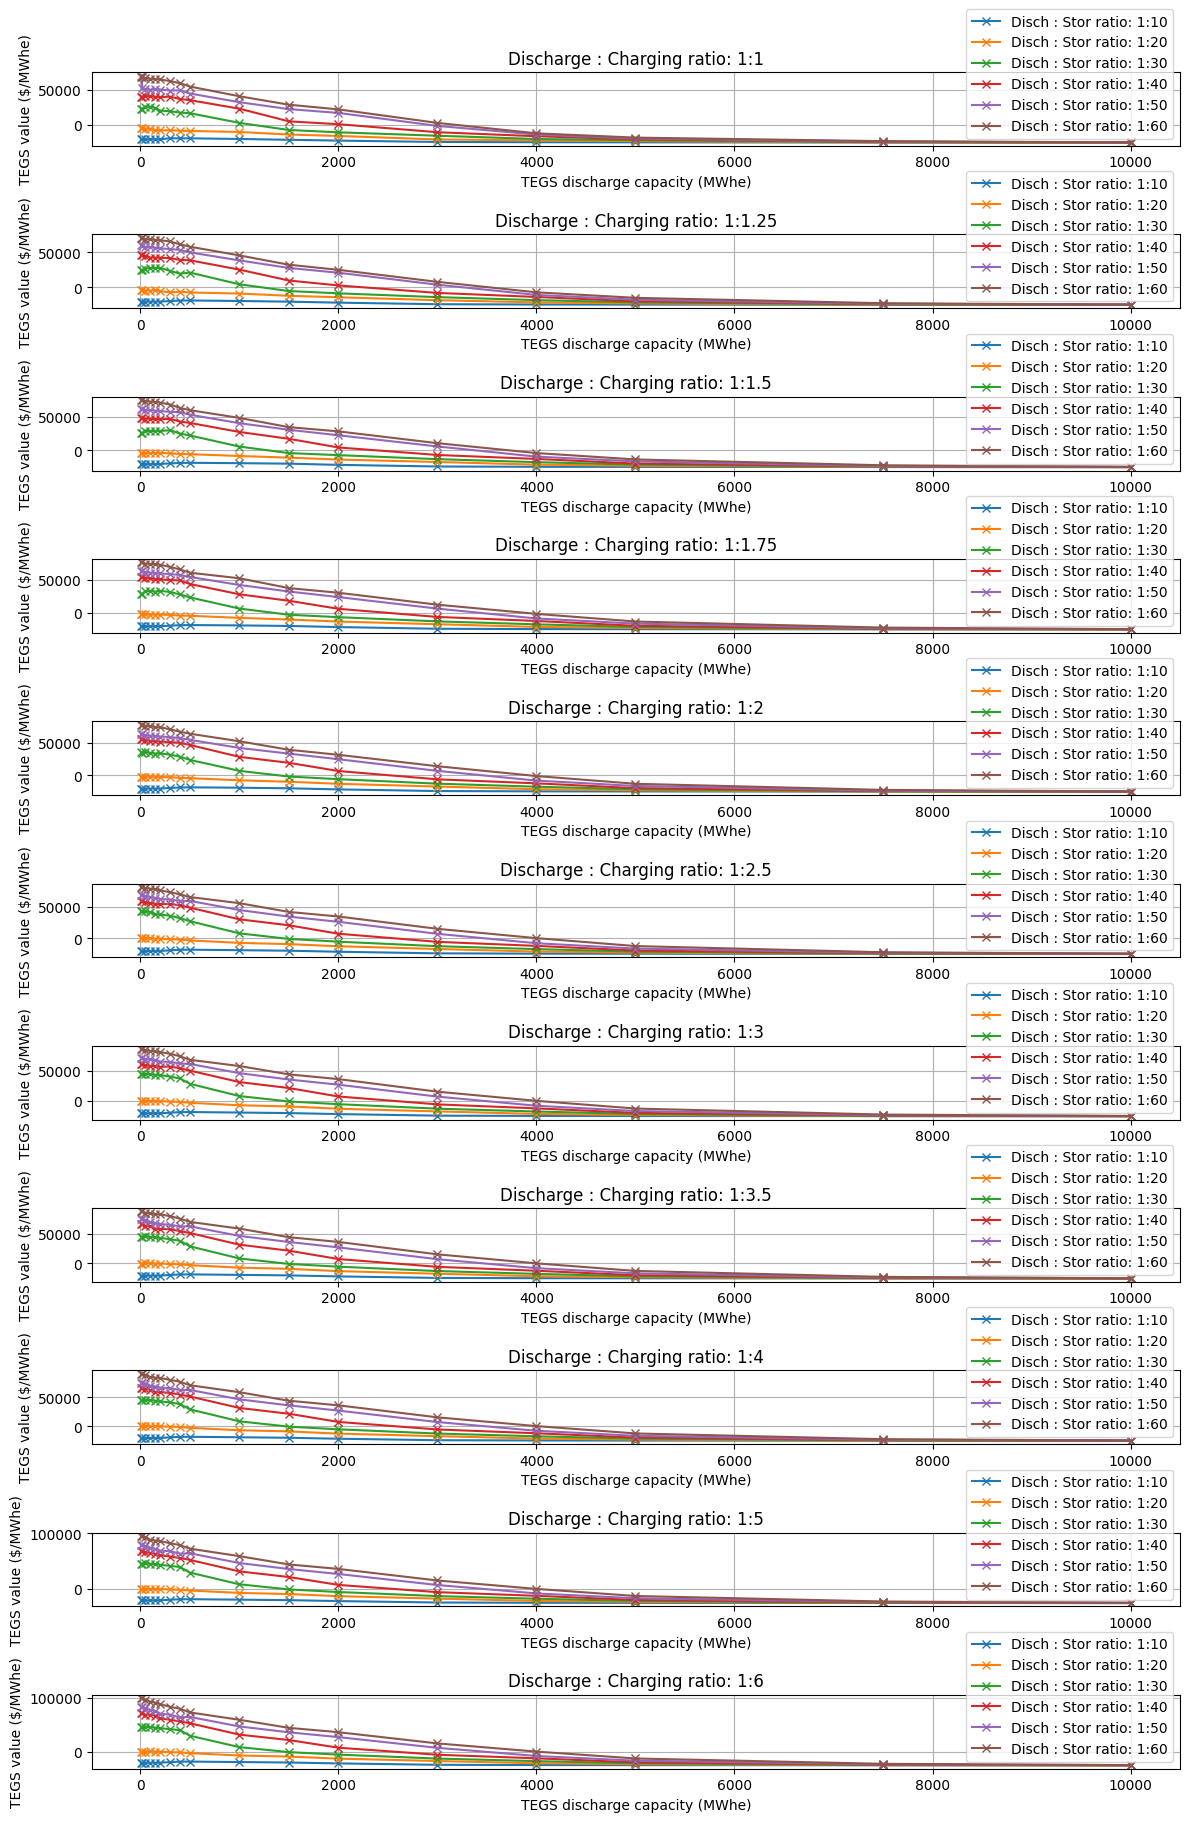

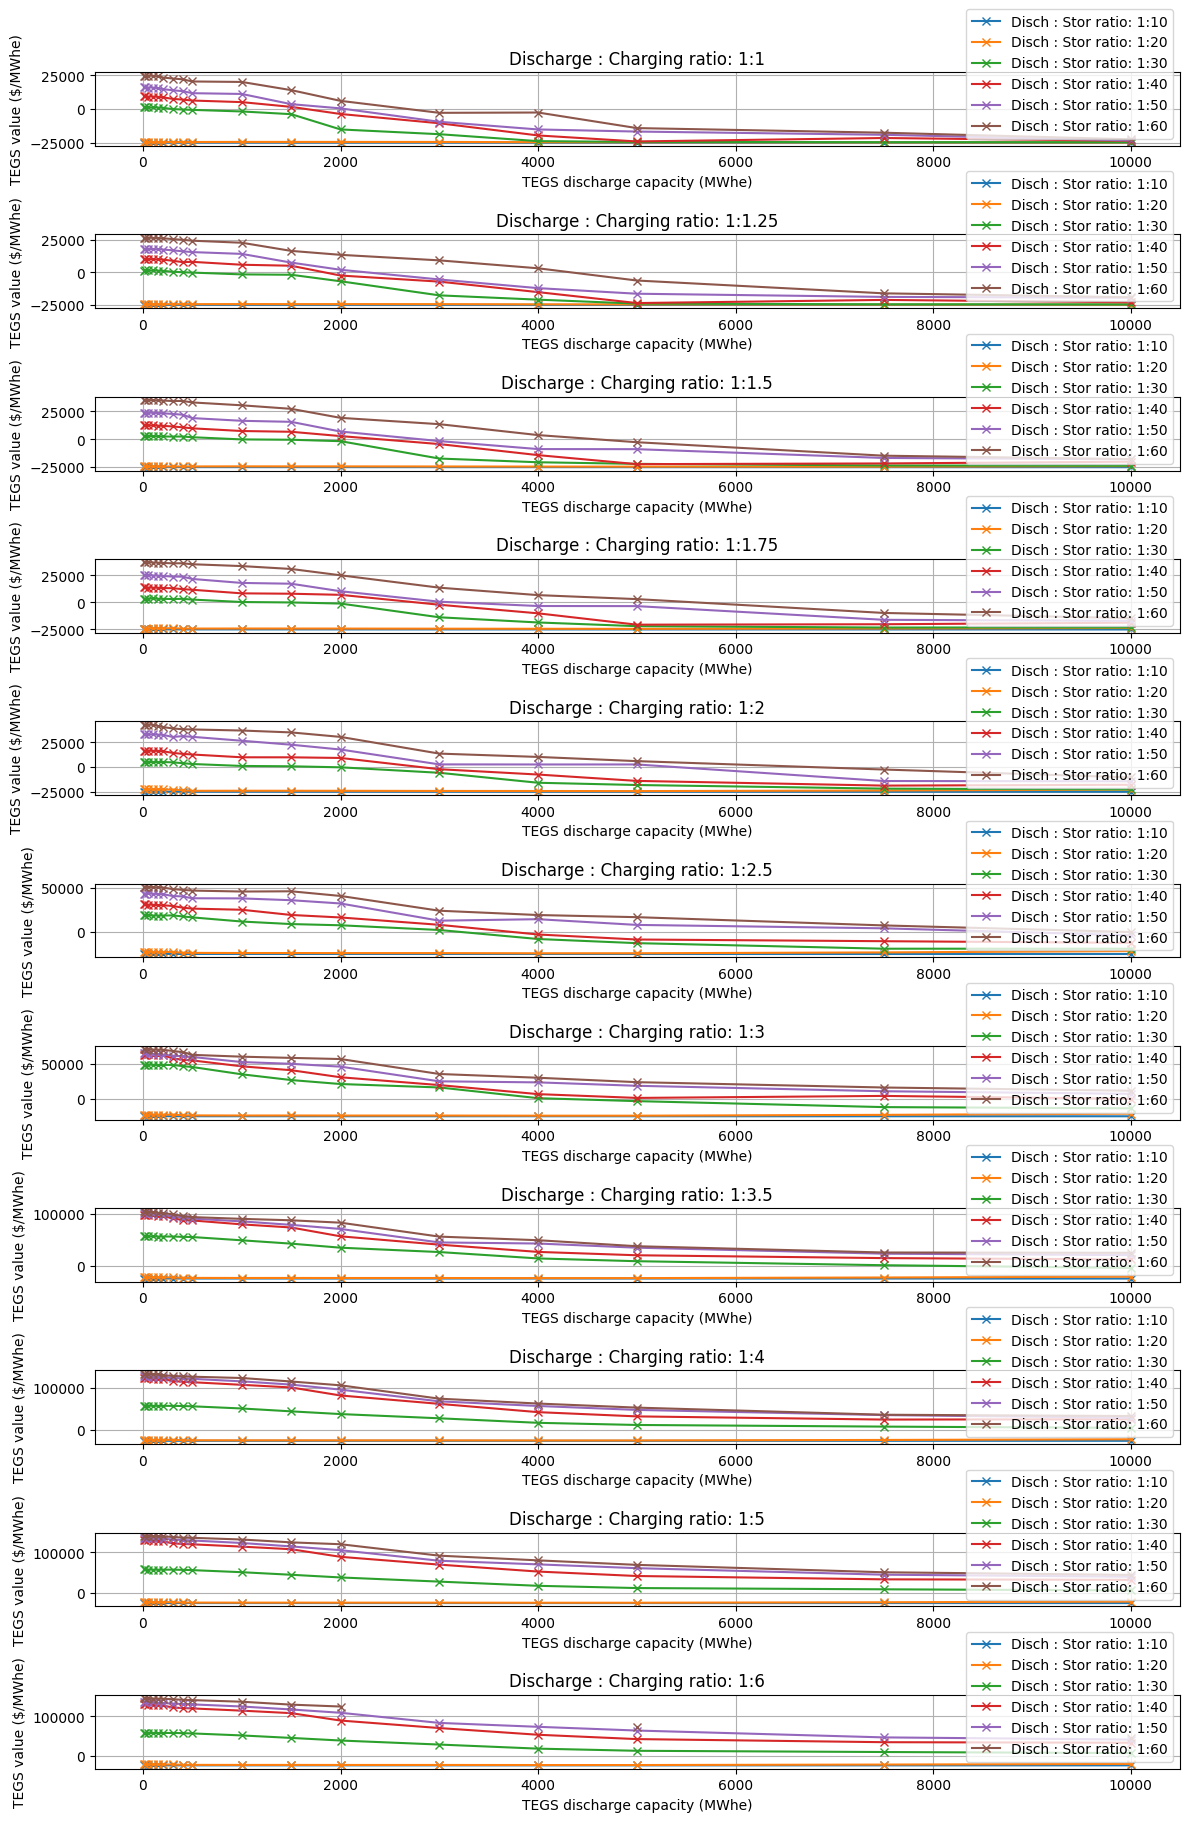

In [8]:
for loc_name, loc_path in location_dir.items():
    prices = shadow_prices[loc_name]
    for emiss_level in emissions_levels:
        for temperature in temperatures:
            for lossrate in lossrates:

                fig, ax = plt.subplots(nrows=len(TEGSdischarge_chargeratio), figsize=(12, 18))

                for idx, tegs_d_c_ratio in enumerate(TEGSdischarge_chargeratio):
                    for tegs_d_s_ratio in TEGSdischarge_storageratio:
                
                            dir_name = make_dirname(emiss_level, temperature, lossrate, TEGSdischargecap, tegs_d_c_ratio, tegs_d_s_ratio)
                            colname = make_colname(emiss_level, temperature, lossrate, TEGSdischargecap, tegs_d_c_ratio, tegs_d_s_ratio)

                            if f'{colname}_disch' in prices.columns:
                                ax[idx].plot(prices.index, prices[f'{colname}_disch'], 'x-', label=f'Disch : Stor ratio: 1:{tegs_d_s_ratio}')
                                # ax[idx].set_xscale('log')
                                # ax[idx].set_ylim(0, 125000)
                    ax[idx].grid()
                    ax[idx].legend()
                    ax[idx].set_xlabel('TEGS discharge capacity (MWhe)')
                    ax[idx].set_ylabel('TEGS value ($/MWhe)')
                    ax[idx].set_title(f'Discharge : Charging ratio: 1:{tegs_d_c_ratio}')
                fig.tight_layout()
                            

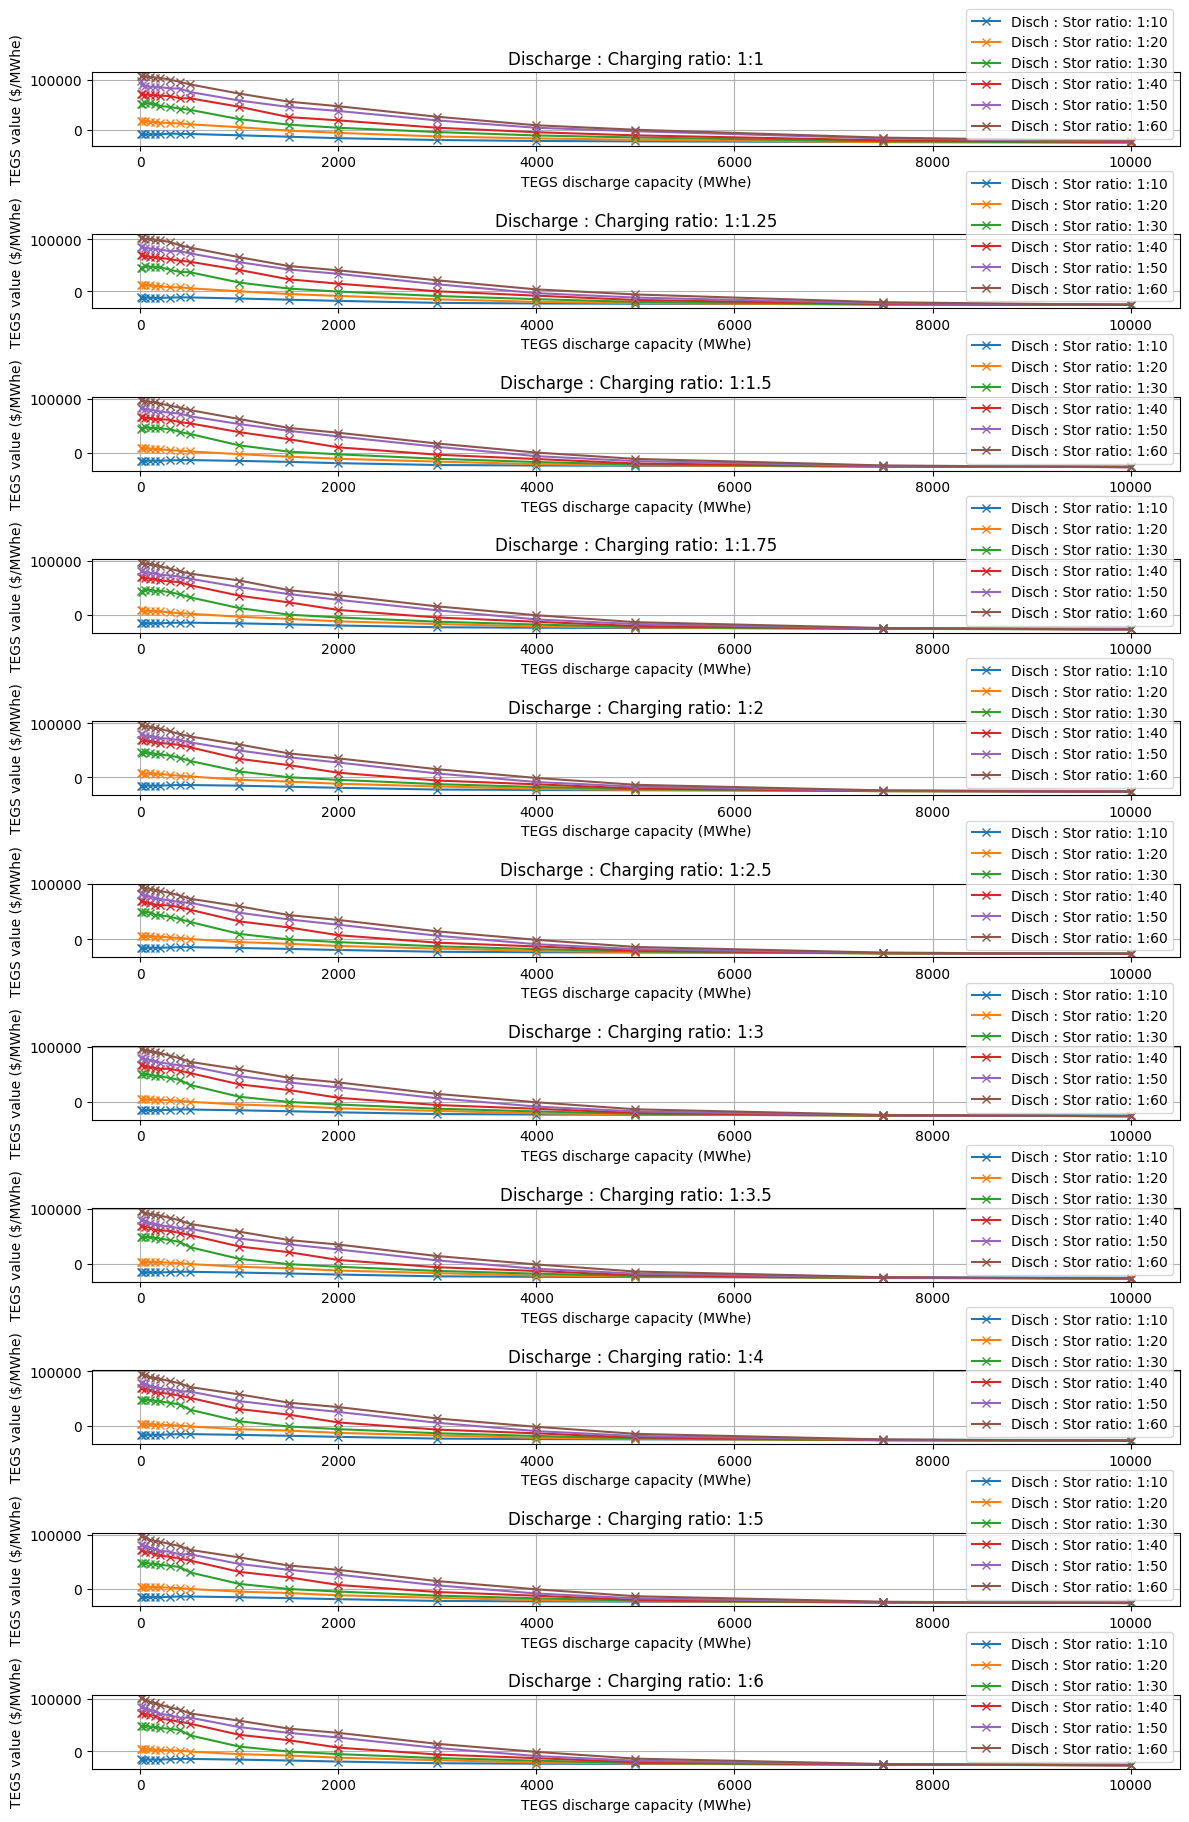

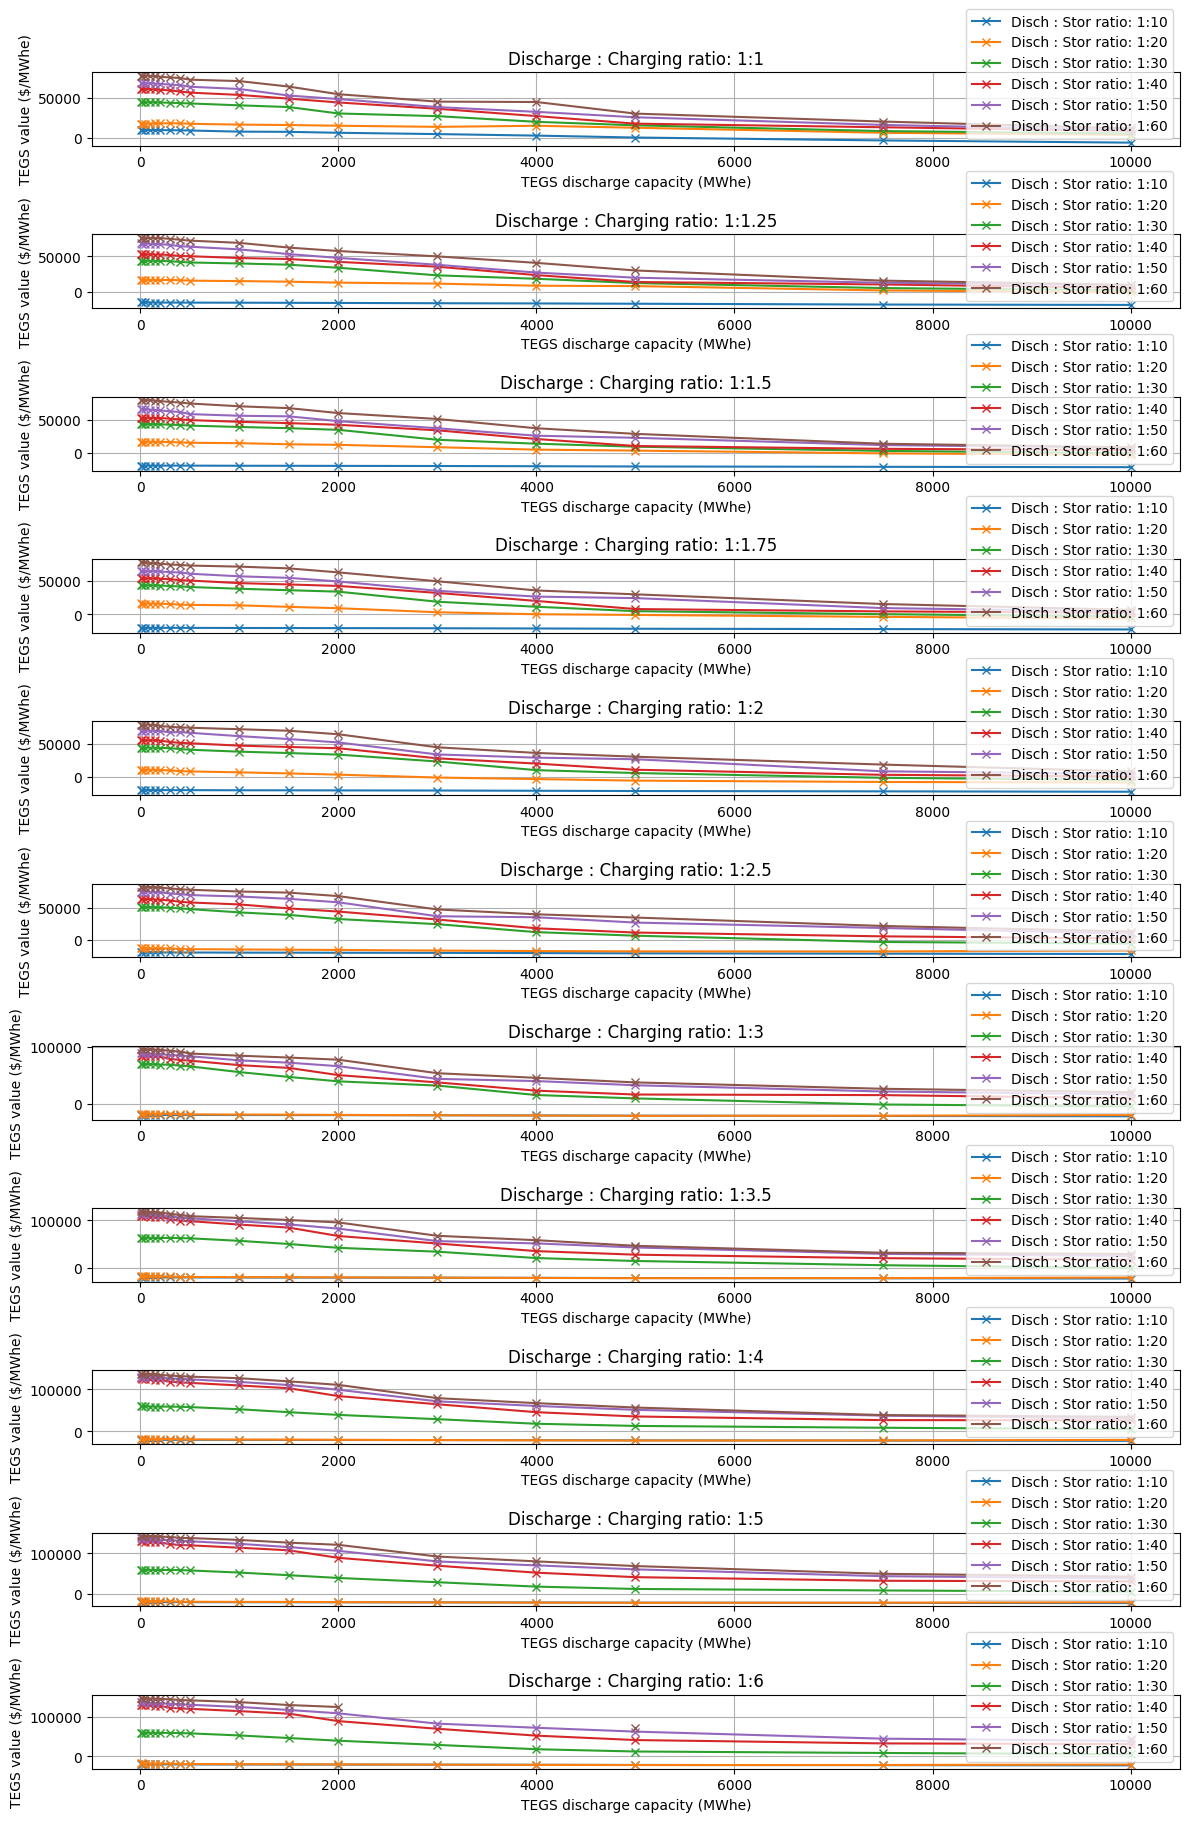

In [9]:
for loc_name, loc_path in location_dir.items():
    prices = shadow_prices[loc_name]
    for emiss_level in emissions_levels:
        for temperature in temperatures:
            for lossrate in lossrates:

                fig, ax = plt.subplots(nrows=len(TEGSdischarge_chargeratio), figsize=(12, 18))

                for idx, tegs_d_c_ratio in enumerate(TEGSdischarge_chargeratio):
                    for tegs_d_s_ratio in TEGSdischarge_storageratio:
                
                            dir_name = make_dirname(emiss_level, temperature, lossrate, TEGSdischargecap, tegs_d_c_ratio, tegs_d_s_ratio)
                            colname = make_colname(emiss_level, temperature, lossrate, TEGSdischargecap, tegs_d_c_ratio, tegs_d_s_ratio)

                            if f'{colname}' in prices.columns:
                                ax[idx].plot(prices.index, prices[f'{colname}'], 'x-', label=f'Disch : Stor ratio: 1:{tegs_d_s_ratio}')
                                # ax[idx].set_xscale('log')
                                # ax[idx].set_ylim(0, 125000)
                    ax[idx].grid()
                    ax[idx].legend()
                    ax[idx].set_xlabel('TEGS discharge capacity (MWhe)')
                    ax[idx].set_ylabel('TEGS value ($/MWhe)')
                    ax[idx].set_title(f'Discharge : Charging ratio: 1:{tegs_d_c_ratio}')
                fig.tight_layout()
                            

In [10]:
df = shadow_prices['newEngland']
for row in df.index:
    print(df.columns[df.loc[row,:].argmax()])
print("##########")
df = shadow_prices['texas']
for row in df.index:
    print(df.columns[df.loc[row,:].argmax()])

0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2
0.01_2400.0_3.0_1.0_60.0_stor2_charg
0.01_2400.0_3.0_1.0_60.0_stor2_charg
0.01_2400.0_3.0_1.0_60.0_stor2_charg
0.01_2400.0_3.0_1.0_60.0_stor2_charg
##########
0.01_2400.0_3.0_6.0_60.0_stor2
0.01_2400.0_3.0_6.0_60.0_stor2
0.01_2400.0_3.0_6.0_60.0_stor2
0.01_2400.0_3.0_6.0_60.0_stor2
0.01_2400.0_3.0_6.0_60.0_stor2
0.01_2400.0_3.0_6.0_60.0_stor2
0.01_2400.0_3.0_6.0_60.0_stor2
0.01_2400.0_3.0_6.0_60.0_stor2_disch
0.01_2400.0_3.0_6.0_60.0_stor2_disch
0.01_2400.0_3.0_6.0_60.0_stor2_disch
0.01_2400.0_3.0_6.0_60.0_stor2_disch
0.01_2400.0_3.0_6.0_60.0_stor2_disch
0.01_2400.0_3.0_5.0_60.0_stor2
0.01_